# 第四章  Numpy库基础

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

rcParams['figure.facecolor']=(1,1,1,1)
rcParams['font.size']=13

%matplotlib inline

## 数据类型转变，直接astype

In [3]:
numeric_strings=np.array(['1.25','3.45','5.65'],dtype=np.string_)
numeric_strings.dtype

dtype('S4')

In [4]:
new_num=numeric_strings.astype(float)
new_num.dtype

dtype('float64')

## Meshgrid函数

In [5]:
points=np.arange(-5,5,0.01)

In [6]:
xs,ys=np.meshgrid(points,points)

In [7]:
z=np.sqrt(xs**2+ys**2)

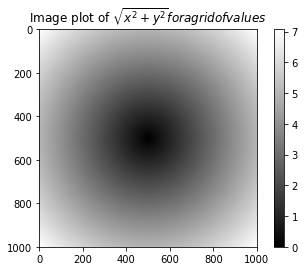

In [8]:
plt.imshow(z,cmap=plt.cm.gray)
plt.colorbar()
plt.title('Image plot of $\sqrt{x^2+y^2} for a grid of values$')
plt.show()

### 绘制3D图

In [9]:
from mpl_toolkits.mplot3d import Axes3D

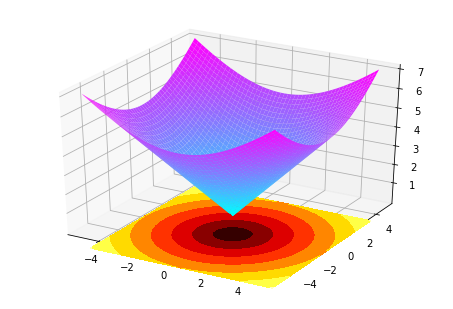

In [10]:
fig=plt.figure()
ax=Axes3D(fig)
ax.plot_surface(xs,ys,z,cmap=plt.cm.cool)
ax.contourf(xs,ys,z,zdir='z',offset=-1,cmap=plt.cm.hot)

## 数组的逻辑运算
数组过滤

In [11]:
xarr=[1.1,1.2,1.3,1.4,1.5]
yarr=[2.1,3.1,4.1,5.1,6.1]
cond=[True,False,True,True,False]
#列表推导式
result=[x if c else y for x,c,y in zip(xarr,cond,yarr)]  
result

[1.1, 3.1, 1.3, 1.4, 6.1]

### ZIP函数
将多个列表按次数组合成一个元素

In [12]:
zz=zip(xarr,cond,yarr)
for i in zz:
    print(i)

(1.1, True, 2.1)
(1.2, False, 3.1)
(1.3, True, 4.1)
(1.4, True, 5.1)
(1.5, False, 6.1)


### np.where()

In [13]:
result=np.where(cond,xarr,yarr)
result

array([ 1.1,  3.1,  1.3,  1.4,  6.1])

In [14]:
arr=np.random.randn(4,4)
arr

array([[ 1.45423541,  0.5776959 ,  0.93541483, -0.63918771],
       [ 0.07467217,  0.10725573, -0.89418469,  0.79132948],
       [ 0.07010234, -0.61952415, -1.09334831, -2.43654636],
       [-0.32574405,  0.83823878, -0.86460255, -0.07790466]])

In [15]:
np.where(arr>0,2,arr)

array([[ 2.        ,  2.        ,  2.        , -0.63918771],
       [ 2.        ,  2.        , -0.89418469,  2.        ],
       [ 2.        , -0.61952415, -1.09334831, -2.43654636],
       [-0.32574405,  2.        , -0.86460255, -0.07790466]])

### np.where()嵌套

In [16]:
cond1=np.array([True,False,True,True,False])
cond2=np.array([False,True,True,True,False])
np.where(cond1 & cond2 ,0,
         np.where(cond1,1,
                  np.where(cond2,2,3)))

array([1, 2, 0, 0, 3])

### 数组逻辑运算

**与**

In [17]:
l1=[True,False,True,True,False]
l2=[False,True,True,True,False]
l1 and l2

[False, True, True, True, False]

**异或**

In [18]:
cond1^cond2

array([ True,  True, False, False, False], dtype=bool)

In [19]:
np.bitwise_xor(cond1,cond2)

array([ True,  True, False, False, False], dtype=bool)

**布尔型转化为0,1**

In [20]:
result=1*(cond1^cond2)+2*(cond1 & cond2) +3*~(cond1|cond2)
result

array([1, 1, 2, 2, 3])

**对 `True` 值进行计数**

In [21]:
arr=np.random.randn(100)

In [22]:
(arr>0).sum()

46

In [23]:
bools=np.array([False,False,False,False])

**bools.any( )**

In [24]:
bools.any()

False

**bools.all( )**

In [25]:
bools=np.array([True,True,True,True])
bools.all()

True

**所有非0元素被当做 `True` **

In [26]:
bools=np.array([1,1,1,1,1])
bools.all()

True

## 排序

In [27]:
arr=np.random.randn(5,3)
arr

array([[ 0.17428235, -0.02747748,  0.3457126 ],
       [ 0.56850584,  0.87412319,  0.81984339],
       [-0.57500536, -0.19172052, -1.22326645],
       [ 0.90221786,  1.51466539, -1.11019579],
       [-0.61281105, -0.87598712,  0.27732713]])

默认在1轴上排序

In [28]:
arr.sort()   
arr

array([[-0.02747748,  0.17428235,  0.3457126 ],
       [ 0.56850584,  0.81984339,  0.87412319],
       [-1.22326645, -0.57500536, -0.19172052],
       [-1.11019579,  0.90221786,  1.51466539],
       [-0.87598712, -0.61281105,  0.27732713]])

arr.sort( ) 改变原数组

np.sort( ) 创建副本

In [29]:
np.sort(arr,1)

array([[-0.02747748,  0.17428235,  0.3457126 ],
       [ 0.56850584,  0.81984339,  0.87412319],
       [-1.22326645, -0.57500536, -0.19172052],
       [-1.11019579,  0.90221786,  1.51466539],
       [-0.87598712, -0.61281105,  0.27732713]])

### 查找分位数
返回第5%的数

In [30]:
large_arr=np.random.randn(1000)
large_arr.sort() #改变原数组
percent_5=large_arr[int(0.05*len(large_arr))]
percent_5

-1.5308582250147977

### 集合运算
方法|说明
:---:|:---
`unique(x)` | 范围唯一值，并进行排序，类似于set()
`intersect1d(x,y)`|交集
`union1d(x,y)`|并集
`in1d`|存在性确认并过滤 
`setdiff1d(x,y)`|in x not in y
`setxor1d(x,y)`|异或，in x or y, nor in x and y at the same time
存在性确认并过滤 

In [31]:
test=np.array([0, 1, 2, 5, 0])
states=[0,2]
mask=np.in1d(test,states)
test[mask]

array([0, 2, 0])

In [32]:
mask=np.in1d(test,states,invert=True)
test[mask]

array([1, 5])

### 从文件读取数据
载入文件相对路径：data与本文件同级目录<br>
错误：`/data/ch04/array_ex.txt`<br>
正确：`data/ch04/array_ex.txt`<br>

In [33]:
arr=np.loadtxt('data/ch04/array_ex.txt',delimiter=',')
arr

array([[ 0.580052,  0.18673 ,  1.040717,  1.134411],
       [ 0.194163, -0.636917, -0.938659,  0.124094],
       [-0.12641 ,  0.268607, -0.695724,  0.047428],
       [-1.484413,  0.004176, -0.744203,  0.005487],
       [ 2.302869,  0.200131,  1.670238, -1.88109 ],
       [-0.19323 ,  1.047233,  0.482803,  0.960334]])

## 线性代数
**点乘**<br>
即是一个 `方法` 也是一个 `函数`

In [34]:
x=np.array([[1.,2.,3.],[4.,5.,6.]])
y=np.array([[6.,23.],[-1,7],[8,9]])
x.dot(y)

array([[  28.,   64.],
       [  67.,  181.]])

In [35]:
np.dot(x,y)

array([[  28.,   64.],
       [  67.,  181.]])

线性代数函数[numpy.linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)

常用线性代数函数
![常用线性代数函数](https://github.com/ds17/file_saved/blob/master/%E5%B8%B8%E7%94%A8numpy.linalg%E5%87%BD%E6%95%B0.jpg?raw=true)


## 随机数生成
numpy.random
![numpy.random](https://github.com/ds17/file_saved/blob/master/numpy.random%E5%87%BD%E6%95%B0.jpg?raw=true)
*上传到 `GitHub` 的图片文件名中不可包含特殊字符，否则图片地址在jupyter中无法渲染*

### 随机漫步

#### 纯Python实现
同等概率的出现 `a,b`
```python
target= a if random.randint(0,1) else b  #randint(0,1)只能同概率的出现0/1， 非0值看作True
```

In [65]:
import random
position=0
walk=[position]
steps=1000
for i in range(1000):
    step= 1 if random.randint(0,1) else -1
    position+=step
    walk.append(position)

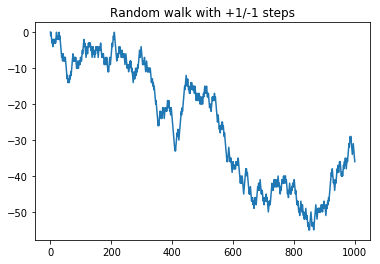

In [66]:
plt.plot(walk)
plt.title('Random walk with +1/-1 steps')

### numpy实现

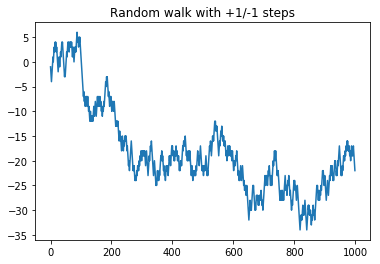

In [82]:
nsteps=1000
draws=np.random.randint(0,2,nsteps)
walk_step=np.where(draws>0,1,-1)
walks=walk_step.cumsum()
plt.plot(walks)
plt.title('Random walk with +1/-1 steps')

`True` 为1，`False` 为0

寻找第一个 True 值位置，即 array.argmax()

寻找第一个 False 值位置，即 array.argmin()

In [90]:
(np.abs(walks)>10).argmax()   #找到第一个离中心10步的位置
#argmax()会对整个array扫描

128

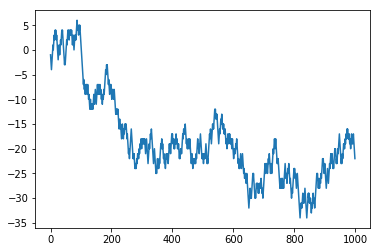

In [101]:
walk_path=np.random.randint(0,2,size=(10,1000))
walk_steps=np.where(walk_path>0,1,-1)
walks_=walk_steps.cumsum(1)
plt.plot(walks)

如何将在一个figure上绘制多个图